In [1]:
import sys
sys.path.append('/Volumes/Samsung_T5/saturnx')

import pathlib

import saturnx as sx

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
obs_id = '1200120102'
data_dir = pathlib.Path('/Volumes/BigBoy/NICER_data/MAXI_J1820+070/raw_data')
file_name = f'ni{obs_id}_0mpu7_cl_bdc.evt.gz'

fits_event_file = data_dir/obs_id/'xti/event_cl'/file_name

# Initializing Event and Gti from FITS file

In [3]:
event = sx.Event.read_fits(fits_event_file)
gti = sx.Gti.read_fits(fits_event_file)

Reading event FITS file
Initializing event object


In [4]:
sx.print_meta_data(event)

EVT_CRE_MODE: Event created from fits file
EVT_FILE_NAME: ni1200120102_0mpu7_cl_bdc.evt.gz
DIR: /Volumes/BigBoy/NICER_data/MAXI_J1820+070/raw_data/1200120102/xti/event_cl
INFO_FROM_HEADER:
--- OBJECT: MAXI_J1820+070
--- TELESCOP: NICER
--- INSTRUME: XTI
--- OBS_ID: 1200120102
--- RA_OBJ: 275.0914
--- DEC_OBJ: 7.1853
--- CREATOR: nicertimecal1 1.5
--- DATE: 2018-03-19T00:07:44
--- SOFTVER: Hea_10Oct2017_V6.22.1_NICER_2018-03-01_V003
--- CALDBVER: xti20210707
--- GCALFILE: nixtiflightpi20170601v007.fits[1]
--- DATE-OBS: 2018-03-13T14:37:20
--- DATE-END: 2018-03-13T22:43:12
--- TSTART: 132417765
--- TSTOP: 132446576
--- MJDREF: None
--- MJDREFI: 56658
--- MJDREFF: 0.000777592592592593
--- TIMEZERO: -1.0
--- LEAPINIT: 2
--- CLOCKAPP: True
--- ONTIME: 5857
--- EXPOSURE: 5857
--- NAXIS2: 8703653
--- TIMESYS: TT
N_ACT_DET: 50
N_INACT_DET: [11, 14, 20, 22, 34, 60]
HISTORY:
--- EVT_CRE_DATE: 2022-5-18,16:57:54
NOTES:
MISSION: NICER
INACT_DET_LIST: [11, 14, 20, 22, 34, 60]


In [5]:
gti

,start,stop,dur,gap
0,132417765.0,132418169.0,404.0,0.0
1,132423245.0,132423250.0,5.0,5076.0
2,132423252.0,132424052.0,800.0,2.0
3,132428618.0,132428624.0,6.0,4566.0
4,132428626.0,132428642.0,16.0,2.0
5,132428644.0,132429897.0,1253.0,2.0
6,132434268.0,132435308.0,1040.0,4371.0
7,132435310.0,132435316.0,6.0,2.0
8,132435318.0,132435456.0,138.0,2.0
9,132438329.0,132438425.0,96.0,2873.0


## Filtering Gti

In [6]:
gti128 = gti > 128

In [7]:
gti128

,start,stop,dur,gap
0,132417765.0,132418169.0,404.0,0.0
1,132423252.0,132424052.0,800.0,5083.0
2,132428644.0,132429897.0,1253.0,4592.0
3,132434268.0,132435308.0,1040.0,4371.0
4,132435318.0,132435456.0,138.0,10.0
5,132438509.0,132439533.0,1024.0,3053.0
6,132445677.0,132446511.0,834.0,6144.0


## Splitting Event

In [8]:
event_list_gti128 = event.split(gti128)

In [9]:
event_list_gti128.info()

,texp,n_events,count_rate,max_time,min_time,min_pi,max_pi,mission
0,403.999023,544034,1346.622069,1.324182e+08,1.324178e+08,20,1487,NICER
1,799.999529,1069240,1336.550787,1.324241e+08,1.324233e+08,20,1492,NICER
2,1252.997541,1788763,1427.587000,1.324299e+08,1.324286e+08,20,1498,NICER
3,1039.997925,1490752,1433.418244,1.324353e+08,1.324343e+08,20,1497,NICER
4,137.999260,202432,1466.906418,1.324355e+08,1.324353e+08,20,1478,NICER
5,1023.997416,1446700,1412.796534,1.324395e+08,1.324385e+08,20,1494,NICER
6,833.997000,1604377,1923.720348,1.324465e+08,1.324457e+08,20,1497,NICER


# Initializing Lightcurve object

In [10]:
time_res = 1./2**13
time_seg = 128
print('Time resolution     :',time_res)
print('Time segment        :',time_seg)
print('Frequency resolution:',1/time_seg)
print('Nyquist frequency.  :',1/2/time_res)

Time resolution     : 0.0001220703125
Time segment        : 128
Frequency resolution: 0.0078125
Nyquist frequency.  : 4096.0


## Computing LightcurveList from EventList

In [11]:
lc_list_gti128 = sx.Lightcurve.from_event(event_list_gti128,time_res=1./2**13,low_en=0.5,high_en=10.)

In [12]:
lc_list_gti128.info()

,texp,tres,n_bins,counts,count_rate,rms,frac_rms,min_time,max_time,min_en,max_en,mission
0,403.998903,0.000122,3309559,498066,1232.839981,0.426979,2.655123,1.324178e+08,1.324182e+08,0.5,10.0,NICER
1,799.999515,0.000122,6553596,977884,1222.355741,0.424637,2.664356,1.324233e+08,1.324241e+08,0.5,10.0,NICER
2,1252.997442,0.000122,10264555,1633780,1303.897315,0.440971,2.583718,1.324286e+08,1.324299e+08,0.5,10.0,NICER
3,1039.997929,0.000122,8519663,1364921,1312.426652,0.439040,2.551465,1.324343e+08,1.324353e+08,0.5,10.0,NICER
4,137.999146,0.000122,1130489,185122,1341.472069,0.443458,2.516677,1.324353e+08,1.324355e+08,0.5,10.0,NICER
5,1023.997319,0.000122,8388586,1324361,1293.324676,0.436190,2.575535,1.324385e+08,1.324395e+08,0.5,10.0,NICER
6,833.996952,0.000122,6832103,1458293,1748.559149,0.523096,2.237397,1.324457e+08,1.324465e+08,0.5,10.0,NICER


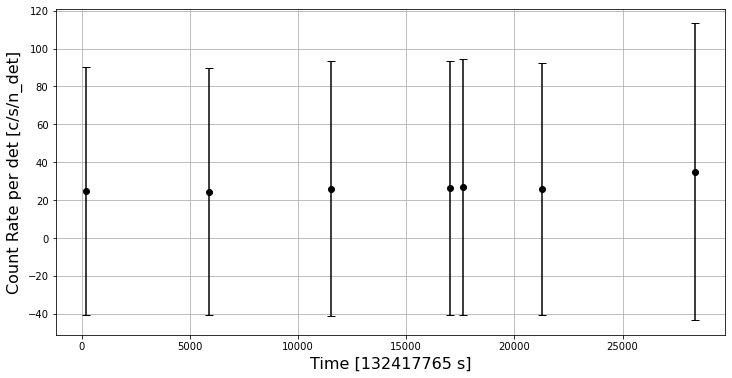

In [13]:
lc_list_gti128.plot()

In [14]:
lc_list128 = lc_list_gti128.split(128)

===> Splitting Lightcurve according to time segment
===> Splitting Lightcurve according to time segment
===> Splitting Lightcurve according to time segment
===> Splitting Lightcurve according to time segment
===> Splitting Lightcurve according to time segment
===> Splitting Lightcurve according to time segment
===> Splitting Lightcurve according to time segment


# Initializing PowerList

In [15]:
power_list = sx.PowerSpectrum.from_lc(lc_list128)

In [16]:
power_list.info()

,fres,nyqf,n_bins,a0,count_rate,frac_rms,frac_rms_err,leahy_norm,rms_norm,weight,min_en,max_en,mission
0,0.007813,4095.999983,1048575,140457.0,1097.321355,2.783005,None,None,None,1,0.5,10.0,NICER
1,0.007813,4095.999983,1048575,153791.0,1201.493328,2.653773,None,None,None,1,0.5,10.0,NICER
2,0.007813,4095.999983,1048575,185459.0,1448.899813,2.491796,None,None,None,1,0.5,10.0,NICER
3,0.007813,4095.999983,1048575,101851.0,795.711693,3.241566,None,None,None,1,0.5,10.0,NICER
4,0.007813,4095.999983,1048575,167448.0,1308.188742,2.591370,None,None,None,1,0.5,10.0,NICER
5,0.007813,4095.999983,1048575,205374.0,1604.485899,2.321985,None,None,None,1,0.5,10.0,NICER
6,0.007813,4095.999983,1048575,122509.0,957.102471,2.957655,None,None,None,1,0.5,10.0,NICER
7,0.007813,4095.999983,1048575,161092.0,1258.532445,2.588364,None,None,None,1,0.5,10.0,NICER
8,0.007813,4095.999983,1048575,160773.0,1256.040255,2.669856,None,None,None,1,0.5,10.0,NICER
9,0.007813,4095.999983,1048575,175215.0,1368.868487,2.502490,None,None,None,1,0.5,10.0,NICER


In [17]:
leahy_power = power_list.average(norm='leahy')

In [18]:
sx.print_meta_data(leahy_power)

PW_CRE_MODE: Average of Leahy power spectra
N_PWA: 40
SEG_DUR: 128
TIME_RES: 0.000122070313
INFO_FROM_HEADER:
--- OBJECT: MAXI_J1820+070
--- TELESCOP: NICER
--- INSTRUME: XTI
--- OBS_ID: 1200120102
--- RA_OBJ: 275.0914
--- DEC_OBJ: 7.1853
--- CREATOR: nicertimecal1 1.5
--- DATE: 2018-03-19T00:07:44
--- SOFTVER: Hea_10Oct2017_V6.22.1_NICER_2018-03-01_V003
--- CALDBVER: xti20210707
--- GCALFILE: nixtiflightpi20170601v007.fits[1]
--- DATE-OBS: 2018-03-13T14:37:20
--- DATE-END: 2018-03-13T22:43:12
--- TSTART: 132417765
--- TSTOP: 132446576
--- MJDREF: None
--- MJDREFI: 56658
--- MJDREFF: 0.000777592592592593
--- TIMEZERO: -1.0
--- LEAPINIT: 2
--- CLOCKAPP: True
--- ONTIME: 5857
--- EXPOSURE: 5857
--- NAXIS2: 8703653
--- TIMESYS: TT
HISTORY:
--- PW_CRE_DATE: 2022-5-18,16:59:34
NOTES:


In [19]:
leahy_power_to_plot = leahy_power.rebin(-30)

Done!


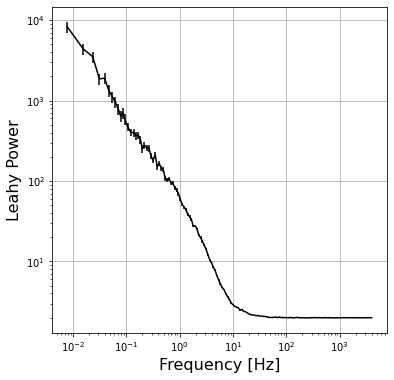

In [20]:
leahy_power_to_plot.plot()

In [21]:
rms_power = leahy_power.normalize(norm='rms').sub_poi(low_freq=3000)

/Users/xizg0003/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


In [22]:
rms_power_to_plot = rms_power.rebin(-30)

Done!


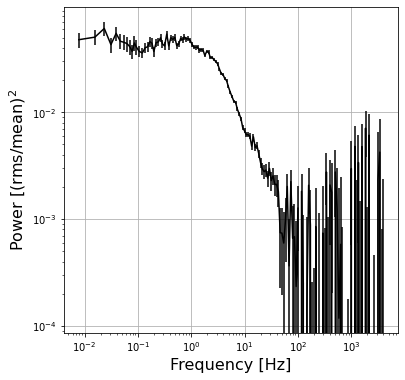

In [23]:
rms_power_to_plot.plot(xy=True)

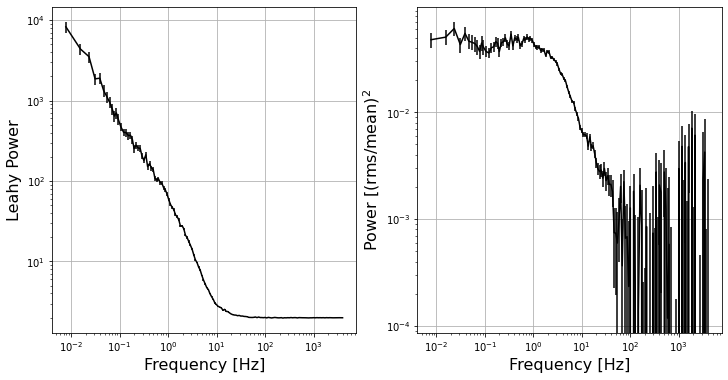

In [24]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

leahy_power_to_plot.plot(axes[0])
rms_power_to_plot.plot(axes[1],xy=True)